In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


from ipywidgets import interact, fixed
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.patches import Ellipse
from scipy import linalg

#import plotly.express as px
import urllib.request
import zipfile
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

import os
# os.environ["OMP_NUM_THREADS"] = "2"

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error

import pandas as pd
import ast
import numpy as np
from pathlib import Path  
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import geopandas as gpd
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.patches import Patch
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter


import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")



C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
msa_emissions = pd.read_csv('../../data/tidy/grouped-msa-total.csv') # modeshares (for commuting)
factors = pd.read_csv('../../data/tidy/factors-factoranalysis.csv') # modeshares (for commuting)
factors_df = pd.read_csv('../../data/tidy/raw-data-cleaned.csv')
raw = pd.read_csv('../../data/tidy/raw-data-cluster.csv')

In [4]:
extracted_df = factors_df[['msa', 'Total population']]
extracted_df

,msa,Total population
0,"Abilene, TX",171354
1,"Akron, OH",703286
2,"Albany, GA",147431
3,"Albany-Lebanon, OR",127216
4,"Albany-Schenectady-Troy, NY",880766
...,...,...
350,"Yakima, WA",250649
351,"York-Hanover, PA",447628
352,"Youngstown-Warren-Boardman, OH-PA",538115
353,"Yuba City, CA",173839


In [5]:
last_column_name = factors.columns[-1]

factors[last_column_name] = factors[last_column_name].astype('category')

In [6]:
# Standardize column names for merging
factors.rename(columns={'msa': 'MSA'}, inplace=True)

# Merge data on the 'MSA' column
data = pd.merge(msa_emissions, factors, on='MSA')

In [7]:
data

,MSA,carbon dioxide equivalent (Ton),Size--Auto,Public Transportation,Transit Alternative Fuel,Density,Active Mobility,Network Connectivity,Network Compactness,Cluster
0,"Abilene, TX",1.604661e+06,0.064028,-0.090245,-0.400060,-0.559346,-0.116166,1.189935,-0.933108,4
1,"Akron, OH",4.038062e+06,-0.644944,-0.092501,0.164063,2.346351,-0.385593,0.417458,0.117013,5
2,"Albany, GA",1.062811e+06,-0.260352,0.017480,0.051700,-0.639637,-0.544648,0.891404,-0.652800,4
3,"Albany-Lebanon, OR",9.640033e+05,-0.245210,0.049604,0.265477,-1.116083,-0.324938,-0.909080,-1.168184,4
4,"Albany-Schenectady-Troy, NY",4.416599e+06,0.192923,-0.144945,-0.251121,0.409409,0.719031,0.376100,0.017240,5
...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",1.345779e+06,0.028180,0.015642,0.263209,-1.323508,-0.913108,0.023896,-1.262105,1
351,"York-Hanover, PA",2.087107e+06,-0.667277,-0.056662,0.188996,1.740468,-0.612997,0.558831,-0.484439,1
352,"Youngstown-Warren-Boardman, OH-PA",3.089513e+06,-0.138366,-0.086734,-0.145649,0.828986,-0.601778,0.650931,-0.057509,5
353,"Yuba City, CA",5.800871e+05,-0.413179,0.043812,0.134645,-0.453808,-0.491657,-0.147507,-0.227548,4


In [8]:
# Merge DataFrames on the columns 'msa' and 'MSA'
merged_df = pd.merge(data, extracted_df, left_on='MSA', right_on='msa')

# Drop the duplicate 'MSA' column if needed
merged_df = merged_df.drop(columns=['msa'])

merged_df

,MSA,carbon dioxide equivalent (Ton),Size--Auto,Public Transportation,Transit Alternative Fuel,Density,Active Mobility,Network Connectivity,Network Compactness,Cluster,Total population
0,"Abilene, TX",1.604661e+06,0.064028,-0.090245,-0.400060,-0.559346,-0.116166,1.189935,-0.933108,4,171354
1,"Akron, OH",4.038062e+06,-0.644944,-0.092501,0.164063,2.346351,-0.385593,0.417458,0.117013,5,703286
2,"Albany, GA",1.062811e+06,-0.260352,0.017480,0.051700,-0.639637,-0.544648,0.891404,-0.652800,4,147431
3,"Albany-Lebanon, OR",9.640033e+05,-0.245210,0.049604,0.265477,-1.116083,-0.324938,-0.909080,-1.168184,4,127216
4,"Albany-Schenectady-Troy, NY",4.416599e+06,0.192923,-0.144945,-0.251121,0.409409,0.719031,0.376100,0.017240,5,880766
...,...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",1.345779e+06,0.028180,0.015642,0.263209,-1.323508,-0.913108,0.023896,-1.262105,1,250649
351,"York-Hanover, PA",2.087107e+06,-0.667277,-0.056662,0.188996,1.740468,-0.612997,0.558831,-0.484439,1,447628
352,"Youngstown-Warren-Boardman, OH-PA",3.089513e+06,-0.138366,-0.086734,-0.145649,0.828986,-0.601778,0.650931,-0.057509,5,538115
353,"Yuba City, CA",5.800871e+05,-0.413179,0.043812,0.134645,-0.453808,-0.491657,-0.147507,-0.227548,4,173839


In [9]:
merged_df['Emissions per capita']=merged_df['carbon dioxide equivalent (Ton)']/merged_df['Total population']
merged_df['carbon dioxide equivalent (MMTCO2e)']=merged_df['carbon dioxide equivalent (Ton)']/1102311.31

In [10]:
merged_df

,MSA,carbon dioxide equivalent (Ton),Size--Auto,Public Transportation,Transit Alternative Fuel,Density,Active Mobility,Network Connectivity,Network Compactness,Cluster,Total population,Emissions per capita,carbon dioxide equivalent (MMTCO2e)
0,"Abilene, TX",1.604661e+06,0.064028,-0.090245,-0.400060,-0.559346,-0.116166,1.189935,-0.933108,4,171354,9.364594,1.455724
1,"Akron, OH",4.038062e+06,-0.644944,-0.092501,0.164063,2.346351,-0.385593,0.417458,0.117013,5,703286,5.741707,3.663268
2,"Albany, GA",1.062811e+06,-0.260352,0.017480,0.051700,-0.639637,-0.544648,0.891404,-0.652800,4,147431,7.208870,0.964166
3,"Albany-Lebanon, OR",9.640033e+05,-0.245210,0.049604,0.265477,-1.116083,-0.324938,-0.909080,-1.168184,4,127216,7.577689,0.874529
4,"Albany-Schenectady-Troy, NY",4.416599e+06,0.192923,-0.144945,-0.251121,0.409409,0.719031,0.376100,0.017240,5,880766,5.014498,4.006672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",1.345779e+06,0.028180,0.015642,0.263209,-1.323508,-0.913108,0.023896,-1.262105,1,250649,5.369176,1.220870
351,"York-Hanover, PA",2.087107e+06,-0.667277,-0.056662,0.188996,1.740468,-0.612997,0.558831,-0.484439,1,447628,4.662592,1.893391
352,"Youngstown-Warren-Boardman, OH-PA",3.089513e+06,-0.138366,-0.086734,-0.145649,0.828986,-0.601778,0.650931,-0.057509,5,538115,5.741362,2.802759
353,"Yuba City, CA",5.800871e+05,-0.413179,0.043812,0.134645,-0.453808,-0.491657,-0.147507,-0.227548,4,173839,3.336922,0.526246


In [11]:
new_df = merged_df.copy()
new_df

,MSA,carbon dioxide equivalent (Ton),Size--Auto,Public Transportation,Transit Alternative Fuel,Density,Active Mobility,Network Connectivity,Network Compactness,Cluster,Total population,Emissions per capita,carbon dioxide equivalent (MMTCO2e)
0,"Abilene, TX",1.604661e+06,0.064028,-0.090245,-0.400060,-0.559346,-0.116166,1.189935,-0.933108,4,171354,9.364594,1.455724
1,"Akron, OH",4.038062e+06,-0.644944,-0.092501,0.164063,2.346351,-0.385593,0.417458,0.117013,5,703286,5.741707,3.663268
2,"Albany, GA",1.062811e+06,-0.260352,0.017480,0.051700,-0.639637,-0.544648,0.891404,-0.652800,4,147431,7.208870,0.964166
3,"Albany-Lebanon, OR",9.640033e+05,-0.245210,0.049604,0.265477,-1.116083,-0.324938,-0.909080,-1.168184,4,127216,7.577689,0.874529
4,"Albany-Schenectady-Troy, NY",4.416599e+06,0.192923,-0.144945,-0.251121,0.409409,0.719031,0.376100,0.017240,5,880766,5.014498,4.006672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",1.345779e+06,0.028180,0.015642,0.263209,-1.323508,-0.913108,0.023896,-1.262105,1,250649,5.369176,1.220870
351,"York-Hanover, PA",2.087107e+06,-0.667277,-0.056662,0.188996,1.740468,-0.612997,0.558831,-0.484439,1,447628,4.662592,1.893391
352,"Youngstown-Warren-Boardman, OH-PA",3.089513e+06,-0.138366,-0.086734,-0.145649,0.828986,-0.601778,0.650931,-0.057509,5,538115,5.741362,2.802759
353,"Yuba City, CA",5.800871e+05,-0.413179,0.043812,0.134645,-0.453808,-0.491657,-0.147507,-0.227548,4,173839,3.336922,0.526246


In [12]:
new_df['Emissions per capita (MTCO2e)']=new_df['Emissions per capita']*0.91

In [13]:
# Assume df is your DataFrame
# Step 1: Separate the 'msa' and 'cluster' columns
msa_cluster = raw[['msa', 'Cluster']]
data_to_standardize = raw.drop(columns=['msa', 'Cluster'])

# Step 2: Standardize the remaining columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_to_standardize)

# Step 3: Create a new DataFrame with the standardized data
standardized_df = pd.DataFrame(standardized_data, columns=data_to_standardize.columns)

# Step 4: Add the 'msa' and 'cluster' columns back
raw = pd.concat([msa_cluster, standardized_df], axis=1)

In [14]:
raw

,msa,Cluster,Node count,Edge count,Degree average,Edge length total (km),Edge length average (km),Streets per node average,Intersection count,Street length total (km),...,Other Fuel (gal/gal equivalent),Electric Propulsion (kwh),Electric Battery (kwh),Diesel (miles),Gasoline (miles),Compressed Natural Gas (miles),Other Fuel (miles),Electric Propulsion (miles),Electric Battery (miles),Population density (people/sq km)
0,"Abilene, TX",4,-0.340119,-0.313531,1.394284,-0.089796,1.204496,1.187439,-0.308795,-0.105106,...,-0.097156,-0.097615,-0.152178,-0.239195,-0.318118,-0.180041,-0.201659,-0.089999,-0.149891,-0.707731
1,"Akron, OH",5,-0.073031,-0.045155,0.627727,-0.180780,-0.989995,0.364867,-0.058596,-0.179483,...,-0.097156,-0.097615,-0.152178,-0.067667,-0.205368,0.195232,-0.201659,-0.089999,-0.149891,1.806119
2,"Albany, GA",4,-0.465912,-0.454650,1.053723,-0.440662,1.028113,0.896967,-0.442272,-0.435458,...,-0.097156,-0.097615,-0.152178,-0.229501,-0.315604,-0.127940,-0.201659,-0.089999,-0.149891,-0.602396
3,"Albany-Lebanon, OR",4,-0.494398,-0.496671,-0.307877,-0.498871,1.468872,-0.881657,-0.492269,-0.499597,...,-0.097156,-0.097615,-0.152178,-0.239195,-0.318118,-0.180041,-0.201659,-0.089999,-0.149891,-0.733188
4,"Albany-Schenectady-Troy, NY",5,0.142895,0.176087,0.485957,0.402801,-0.262060,0.357593,0.185299,0.367444,...,-0.097156,-0.097615,-0.064929,0.326039,-0.047941,-0.180041,-0.201659,-0.089999,-0.149891,0.169205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",1,-0.413511,-0.402984,0.682944,-0.228503,1.739652,0.055046,-0.406768,-0.245774,...,-0.097156,-0.097615,-0.152178,-0.191356,-0.262700,-0.180041,-0.201659,-0.089999,-0.149891,-0.722257
351,"York-Hanover, PA",1,-0.291754,-0.270291,0.894350,-0.268256,-0.152058,0.525332,-0.265829,-0.280884,...,-0.097156,-0.097615,-0.152178,-0.205427,0.948860,-0.114442,-0.201659,-0.089999,-0.149891,0.836224
352,"Youngstown-Warren-Boardman, OH-PA",5,-0.115311,-0.081366,0.913208,0.028462,-0.178701,0.614765,-0.091407,0.017118,...,-0.097156,-0.097615,-0.152178,-0.143107,-0.220272,-0.180041,-0.201659,-0.089999,-0.149891,0.178285
353,"Yuba City, CA",4,-0.466916,-0.464644,0.148688,-0.515182,0.511774,-0.153088,-0.458354,-0.510606,...,-0.097156,-0.097615,-0.152178,-0.178559,-0.318118,-0.180041,-0.201659,-0.089999,-0.149891,-0.432031


In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error

# Define a function to train the model and calculate error metrics
def train_and_evaluate(X, y, param_grid, test_size=0.3, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on both training and test sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Calculate error metrics for the training set
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    
    # Calculate error metrics for the test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    
    return r2_train, mape_train, rmse_train, mse_train, r2_test, mape_test, rmse_test, mse_test

# Define the parameter grid to search over
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7],
    'n_estimators': [100, 200, 300, 400, 500],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(raw.drop(columns=['msa', 'Cluster']), drop_first=False)

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (only emissions)
target = 'carbon dioxide equivalent (MMTCO2e)'
y = new_df[target]  # assuming 'raw' is your original DataFrame containing this target
r2_train, mape_train, rmse_train, mse_train, r2_test, mape_test, rmse_test, mse_test = train_and_evaluate(X, y, param_grid)

# Store the results for both training and test sets
results['Training'] = {'R^2': r2_train, 'MAPE': mape_train, 'RMSE': rmse_train, 'MSE': mse_train}
results['Test'] = {'R^2': r2_test, 'MAPE': mape_test, 'RMSE': rmse_test, 'MSE': mse_test}

# Convert results to a DataFrame
results_df_without_cluster = pd.DataFrame(results)

results_df_without_cluster


Fitting 5 folds for each of 50 candidates, totalling 250 fits


,Training,Test
R^2,0.998309,0.942184
MAPE,0.099806,0.171236
RMSE,0.231822,1.996564
MSE,0.053741,3.986269


Fitting 5 folds for each of 50 candidates, totalling 250 fits
      Training      Test
R^2   0.997582  0.941466
MAPE  0.111219  0.172532
RMSE  0.277196  2.008923
MSE   0.076838  4.035772
Legend labels: ['1', '2', '3', '4', '5', '6', '7']


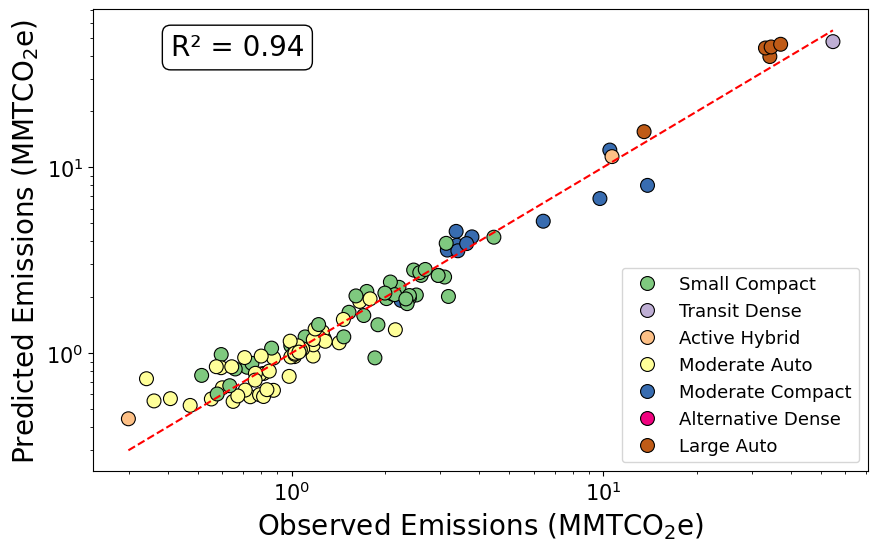

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Define a function to train the model and calculate error metrics
def train_and_evaluate(X, y, param_grid, test_size=0.3, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on both training and test sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Calculate error metrics for the training set
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    
    # Calculate error metrics for the test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    
    return y_train, y_train_pred, y_test, y_test_pred, r2_train, mape_train, rmse_train, mse_train, r2_test, mape_test, rmse_test, mse_test, X_test

# Define the parameter grid to search over
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7],
    'n_estimators': [50, 100, 150, 200, 250],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(raw.drop(columns=['msa', 'Cluster']), drop_first=False)

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (only emissions)
target = 'carbon dioxide equivalent (MMTCO2e)'
y = new_df[target]  # assuming 'new_df' is your DataFrame containing this target
y_train, y_train_pred, y_test, y_test_pred, r2_train, mape_train, rmse_train, mse_train, r2_test, mape_test, rmse_test, mse_test, X_test = train_and_evaluate(X, y, param_grid)

# Store the results for both training and test sets
results['Training'] = {'R^2': r2_train, 'MAPE': mape_train, 'RMSE': rmse_train, 'MSE': mse_train}
results['Test'] = {'R^2': r2_test, 'MAPE': mape_test, 'RMSE': rmse_test, 'MSE': mse_test}

# Convert results to a DataFrame
results_df_without_cluster = pd.DataFrame(results)

# Print the results DataFrame
print(results_df_without_cluster)

# Ensure 'Cluster' column is in the test dataset
X_test['Cluster'] = raw.loc[X_test.index, 'Cluster']

# Create a DataFrame for visualization
vis_df = X_test.copy()
vis_df['Actual Emissions'] = y_test
vis_df['Predicted Emissions'] = y_test_pred

# Define a custom color palette
custom_palette = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']
color_iter = ListedColormap(custom_palette)

# Define cluster labels
cluster_labels = {
    1: 'Small Compact', 
    2: 'Transit Dense', 
    3: 'Active Hybrid', 
    4: 'Moderate Auto', 
    5: 'Moderate Compact', 
    6: 'Alternative Dense',
    7: 'Large Auto'
}

# Main Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each cluster with different colors
sns.scatterplot(data=vis_df, x='Actual Emissions', y='Predicted Emissions', hue='Cluster', 
                palette=custom_palette, alpha=1, ax=ax, edgecolor='black', s=100)

# Diagonal line (1:1 line)
ax.plot([min(vis_df['Actual Emissions']), max(vis_df['Actual Emissions'])], 
        [min(vis_df['Actual Emissions']), max(vis_df['Actual Emissions'])], 
        color='red', linestyle='--')

# Labels and ticks
ax.set_xlabel('Observed Emissions (MMTCO$_2$e)', fontsize=20)
ax.set_ylabel('Predicted Emissions (MMTCO$_2$e)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

# Set log-log scale
ax.set_xscale('log')
ax.set_yscale('log')

# Add R-squared annotation
ax.annotate(f'R² = {r2_test:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=20,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Debug: Print legend handles and labels to verify
handles, labels = ax.get_legend_handles_labels()
print("Legend labels:", labels)

# Create a mapping of labels to cluster labels
label_mapping = {str(i): name for i, name in cluster_labels.items()}
new_labels = [label_mapping.get(label, label) for label in labels]

# Update legend with new labels
ax.legend(handles=handles, labels=new_labels, loc='lower right', fontsize=13)

plt.tight_layout
# Save and show plot
plt.savefig('../../figures/actual-predicted-emissions-without-cluster.jpg', dpi=600)
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits
      Training      Test
R^2   0.997586  0.941541
MAPE  0.112854  0.172910
RMSE  0.277005  2.007632
MSE   0.076732  4.030588
Legend labels: ['1', '2', '3', '4', '5', '6', '7']


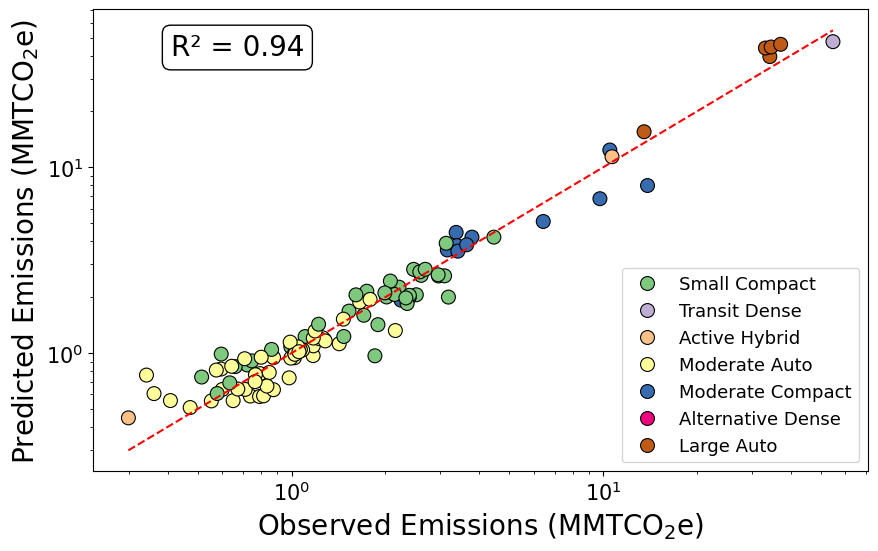

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Define a function to train the model and calculate error metrics
def train_and_evaluate(X, y, param_grid, test_size=0.3, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on both training and test sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Calculate error metrics for the training set
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    
    # Calculate error metrics for the test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    
    return y_train, y_train_pred, y_test, y_test_pred, r2_train, mape_train, rmse_train, mse_train, r2_test, mape_test, rmse_test, mse_test, X_test

# Define the parameter grid to search over
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7],
    'n_estimators': [50, 100, 150, 200, 250],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(raw.drop(columns=['msa']), drop_first=False)

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (only emissions)
target = 'carbon dioxide equivalent (MMTCO2e)'
y = new_df[target]  # assuming 'new_df' is your DataFrame containing this target
y_train, y_train_pred, y_test, y_test_pred, r2_train, mape_train, rmse_train, mse_train, r2_test, mape_test, rmse_test, mse_test, X_test = train_and_evaluate(X, y, param_grid)

# Store the results for both training and test sets
results['Training'] = {'R^2': r2_train, 'MAPE': mape_train, 'RMSE': rmse_train, 'MSE': mse_train}
results['Test'] = {'R^2': r2_test, 'MAPE': mape_test, 'RMSE': rmse_test, 'MSE': mse_test}

# Convert results to a DataFrame
results_df_without_cluster = pd.DataFrame(results)

# Print the results DataFrame
print(results_df_without_cluster)

# Ensure 'Cluster' column is in the test dataset
X_test['Cluster'] = raw.loc[X_test.index, 'Cluster']

# Create a DataFrame for visualization
vis_df = X_test.copy()
vis_df['Actual Emissions'] = y_test
vis_df['Predicted Emissions'] = y_test_pred

# Define a custom color palette
custom_palette = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17']
color_iter = ListedColormap(custom_palette)

# Define cluster labels
cluster_labels = {
    1: 'Small Compact', 
    2: 'Transit Dense', 
    3: 'Active Hybrid', 
    4: 'Moderate Auto', 
    5: 'Moderate Compact', 
    6: 'Alternative Dense',
    7: 'Large Auto'
}

# Main Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each cluster with different colors
sns.scatterplot(data=vis_df, x='Actual Emissions', y='Predicted Emissions', hue='Cluster', 
                palette=custom_palette, alpha=1, ax=ax, edgecolor='black', s=100)

# Diagonal line (1:1 line)
ax.plot([min(vis_df['Actual Emissions']), max(vis_df['Actual Emissions'])], 
        [min(vis_df['Actual Emissions']), max(vis_df['Actual Emissions'])], 
        color='red', linestyle='--')

# Labels and ticks
ax.set_xlabel('Observed Emissions (MMTCO$_2$e)', fontsize=20)
ax.set_ylabel('Predicted Emissions (MMTCO$_2$e)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

# Set log-log scale
ax.set_xscale('log')
ax.set_yscale('log')

# Add R-squared annotation
ax.annotate(f'R² = {r2_test:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=20,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Debug: Print legend handles and labels to verify
handles, labels = ax.get_legend_handles_labels()
print("Legend labels:", labels)

# Create a mapping of labels to cluster labels
label_mapping = {str(i): name for i, name in cluster_labels.items()}
new_labels = [label_mapping.get(label, label) for label in labels]

# Update legend with new labels
ax.legend(handles=handles, labels=new_labels, loc='lower right', fontsize=13)

plt.tight_layout
# Save and show plot
plt.savefig('../../figures/actual-predicted-emissions-with-cluster.jpg', dpi=600)
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


,R^2,MAPE,RMSE,MSE
carbon dioxide equivalent (MMTCO2e),0.941466,0.172532,2.008923,4.035772
Emissions per capita (MTCO2e),0.285057,0.158534,1.288747,1.660870


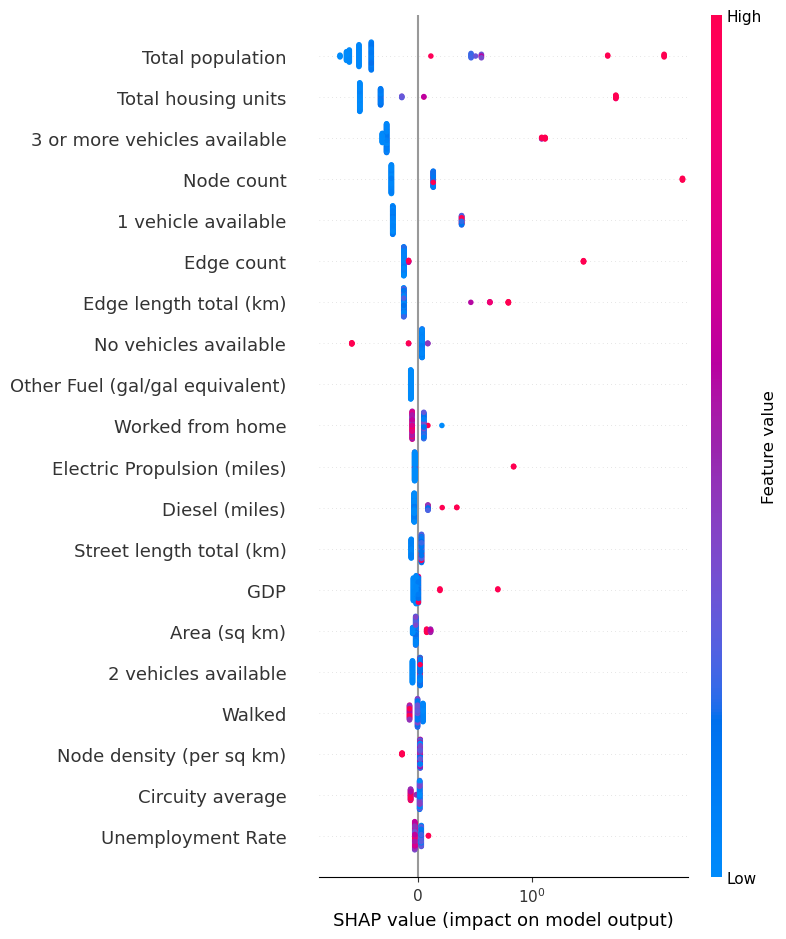

In [28]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error
import shap
import matplotlib.pyplot as plt

# Define a function to train the model, calculate error metrics, and optionally plot SHAP values
def train_evaluate_and_shap(X, y, param_grid, test_size=0.3, random_state=42, plot_beeswarm=False, save_plot_path=None, log_scale=False):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Create a SHAP explainer
    explainer = shap.TreeExplainer(best_model)
    
    # Calculate SHAP values for the test set
    shap_values = explainer.shap_values(X_test)
    
    if plot_beeswarm:
        # Apply log scaling if specified
        if log_scale:
            shap_values = np.sign(shap_values) * np.log1p(np.abs(shap_values))
        
        # Create a beeswarm plot of SHAP values
        #shap.summary_plot(shap_values, X_test, show=False, max_display=X_test.shape[1])
        shap.summary_plot(shap_values, X_test, show=False)
        
        # Apply log scale to the x-axis if log scaling is used
        if log_scale:
            plt.xscale('symlog')
        
        plt.tight_layout()
        if save_plot_path:
            plt.savefig(save_plot_path, dpi=360, bbox_inches='tight')
        else:
            plt.show()
    
    return r2, mape, rmse, mse, shap_values

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(raw.drop(columns=['msa', 'Cluster']), drop_first=False)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7],
    'n_estimators': [50, 100, 150, 200, 250],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (emission types)
for target in ['carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']:
    # Set plot_beeswarm to True only for "carbon dioxide equivalent (MMTCO2e)"
    plot_beeswarm = (target == 'carbon dioxide equivalent (MMTCO2e)')
    
    # Train the model and calculate metrics
    y = new_df[target]
    
    # Specify the file path to save the SHAP plot, if applicable
    save_plot_path = f'../../figures/without-shap-{target.replace(" ", "_")}.jpg' if plot_beeswarm else None
    
    r2, mape, rmse, mse, shap_values = train_evaluate_and_shap(
        X, y, param_grid, plot_beeswarm=plot_beeswarm, save_plot_path=save_plot_path, log_scale=True  # Enable log scaling here
    )
    
    # Store the results
    results[target] = {'R^2': r2, 'MAPE': mape, 'RMSE': rmse, 'MSE': mse}

# Convert results to a DataFrame
results_df_without_cluster = pd.DataFrame(results).T

# Print the results DataFrame
results_df_without_cluster


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


,R^2,MAPE,RMSE,MSE
carbon dioxide equivalent (MMTCO2e),0.941541,0.172910,2.007632,4.030588
Emissions per capita (MTCO2e),0.262287,0.162277,1.309108,1.713765


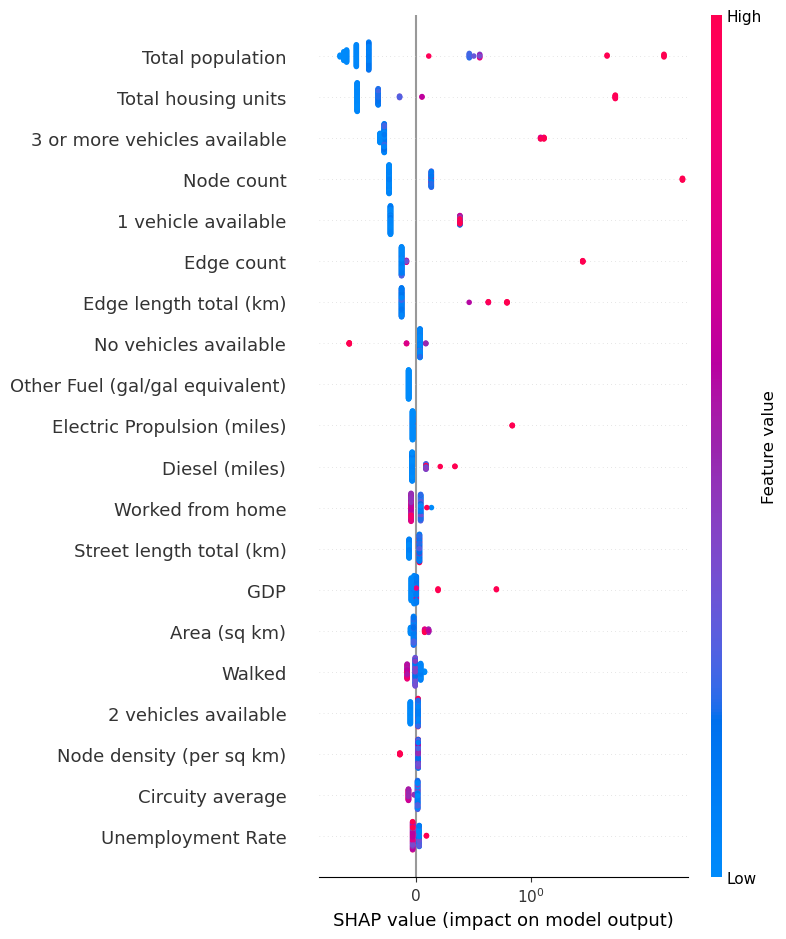

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error
import shap
import matplotlib.pyplot as plt

# Define a function to train the model, calculate error metrics, and optionally plot SHAP values
def train_evaluate_and_shap(X, y, param_grid, test_size=0.3, random_state=42, plot_beeswarm=False, save_plot_path=None, log_scale=False):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Create a SHAP explainer
    explainer = shap.TreeExplainer(best_model)
    
    # Calculate SHAP values for the test set
    shap_values = explainer.shap_values(X_test)
    
    if plot_beeswarm:
        # Apply log scaling if specified
        if log_scale:
            shap_values = np.sign(shap_values) * np.log1p(np.abs(shap_values))
        
        # Create a beeswarm plot of SHAP values
        #shap.summary_plot(shap_values, X_test, show=False, max_display=X_test.shape[1])
        shap.summary_plot(shap_values, X_test, show=False)
        
        # Apply log scale to the x-axis if log scaling is used
        if log_scale:
            plt.xscale('symlog')
        
        plt.tight_layout()
        if save_plot_path:
            plt.savefig(save_plot_path, dpi=360, bbox_inches='tight')
        else:
            plt.show()
    
    return r2, mape, rmse, mse, shap_values

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(raw.drop(columns=['msa']), drop_first=False)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7],
    'n_estimators': [50, 100, 150, 200, 250],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (emission types)
for target in ['carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']:
    # Set plot_beeswarm to True only for "carbon dioxide equivalent (MMTCO2e)"
    plot_beeswarm = (target == 'carbon dioxide equivalent (MMTCO2e)')
    
    # Train the model and calculate metrics
    y = new_df[target]
    
    # Specify the file path to save the SHAP plot, if applicable
    save_plot_path = f'../../figures/with-shap-{target.replace(" ", "_")}.jpg' if plot_beeswarm else None
    
    r2, mape, rmse, mse, shap_values = train_evaluate_and_shap(
        X, y, param_grid, plot_beeswarm=plot_beeswarm, save_plot_path=save_plot_path, log_scale=True  # Enable log scaling here
    )
    
    # Store the results
    results[target] = {'R^2': r2, 'MAPE': mape, 'RMSE': rmse, 'MSE': mse}

# Convert results to a DataFrame
results_df_with_cluster = pd.DataFrame(results).T

# Print the results DataFrame
results_df_with_cluster


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


,R^2,MAPE,RMSE,MSE
carbon dioxide equivalent (MMTCO2e),0.941541,0.172910,2.007632,4.030588
Emissions per capita (MTCO2e),0.262287,0.162277,1.309108,1.713765


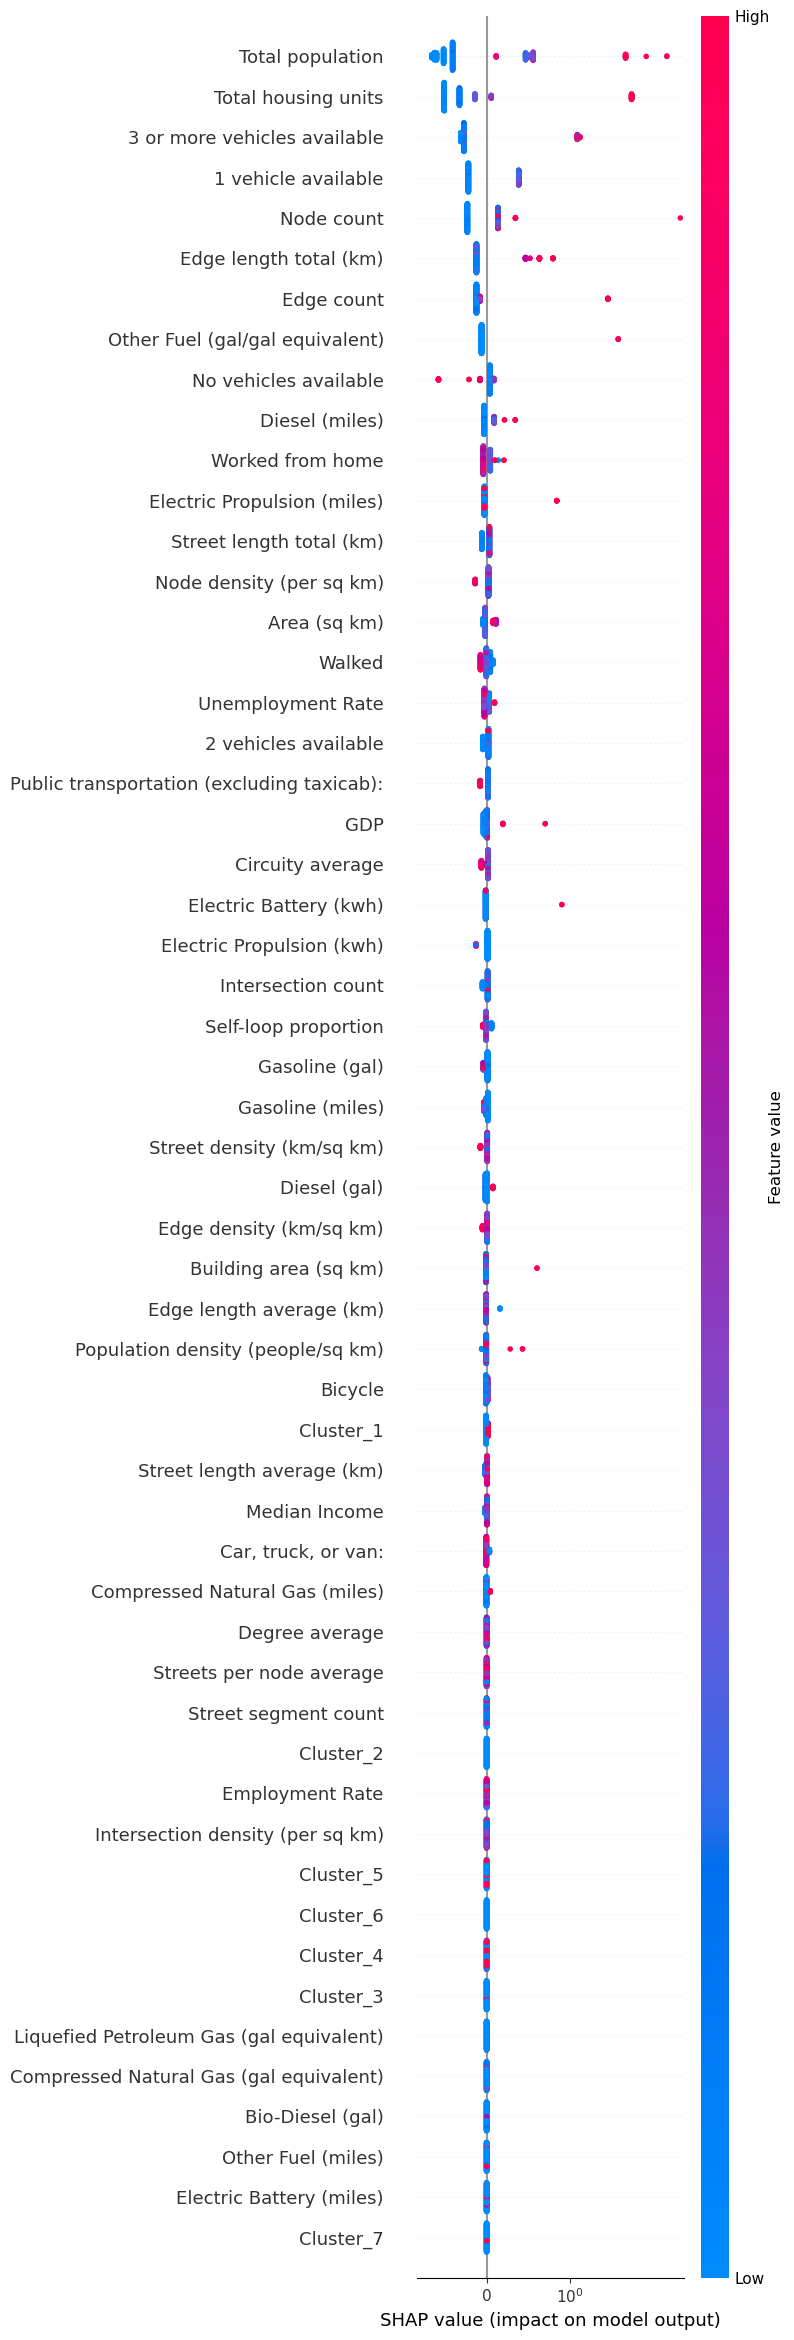

In [37]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error
import shap
import matplotlib.pyplot as plt

# Define a function to train the model, calculate error metrics, and optionally plot SHAP values
def train_evaluate_and_shap(X, y, param_grid, test_size=0.3, random_state=42, plot_beeswarm=False, save_plot_path=None, log_scale=False):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Create a SHAP explainer
    explainer = shap.TreeExplainer(best_model)
    
    # Calculate SHAP values for the **training** set
    shap_values = explainer.shap_values(X_train)
    
    if plot_beeswarm:
        # Apply log scaling if specified
        if log_scale:
            shap_values = np.sign(shap_values) * np.log1p(np.abs(shap_values))
        
        # Create a beeswarm plot of SHAP values
        #shap.summary_plot(shap_values, X_train, show=False)
        shap.summary_plot(shap_values, X_train, show=False, max_display=X_train.shape[1])
        
        # Apply log scale to the x-axis if log scaling is used
        if log_scale:
            plt.xscale('symlog')
        
        plt.tight_layout()
        if save_plot_path:
            plt.savefig(save_plot_path, dpi=360, bbox_inches='tight')
        else:
            plt.show()
    
    return r2, mape, rmse, mse, shap_values

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(raw.drop(columns=['msa']), drop_first=False)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7],
    'n_estimators': [50, 100, 150, 200, 250],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (emission types)
for target in ['carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']:
    # Set plot_beeswarm to True only for "carbon dioxide equivalent (MMTCO2e)"
    plot_beeswarm = (target == 'carbon dioxide equivalent (MMTCO2e)')
    
    # Train the model and calculate metrics
    y = new_df[target]
    
    # Specify the file path to save the SHAP plot, if applicable
    save_plot_path = f'../../figures/with-shap-{target.replace(" ", "_")}.jpg' if plot_beeswarm else None
    
    r2, mape, rmse, mse, shap_values = train_evaluate_and_shap(
        X, y, param_grid, plot_beeswarm=plot_beeswarm, save_plot_path=save_plot_path, log_scale=True  # Enable log scaling here
    )
    
    # Store the results
    results[target] = {'R^2': r2, 'MAPE': mape, 'RMSE': rmse, 'MSE': mse}

# Convert results to a DataFrame
results_df_with_cluster = pd.DataFrame(results).T

# Print the results DataFrame
results_df_with_cluster


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


,R^2,MAPE,RMSE,MSE
carbon dioxide equivalent (MMTCO2e),0.941466,0.172532,2.008923,4.035772
Emissions per capita (MTCO2e),0.285057,0.158534,1.288747,1.660870


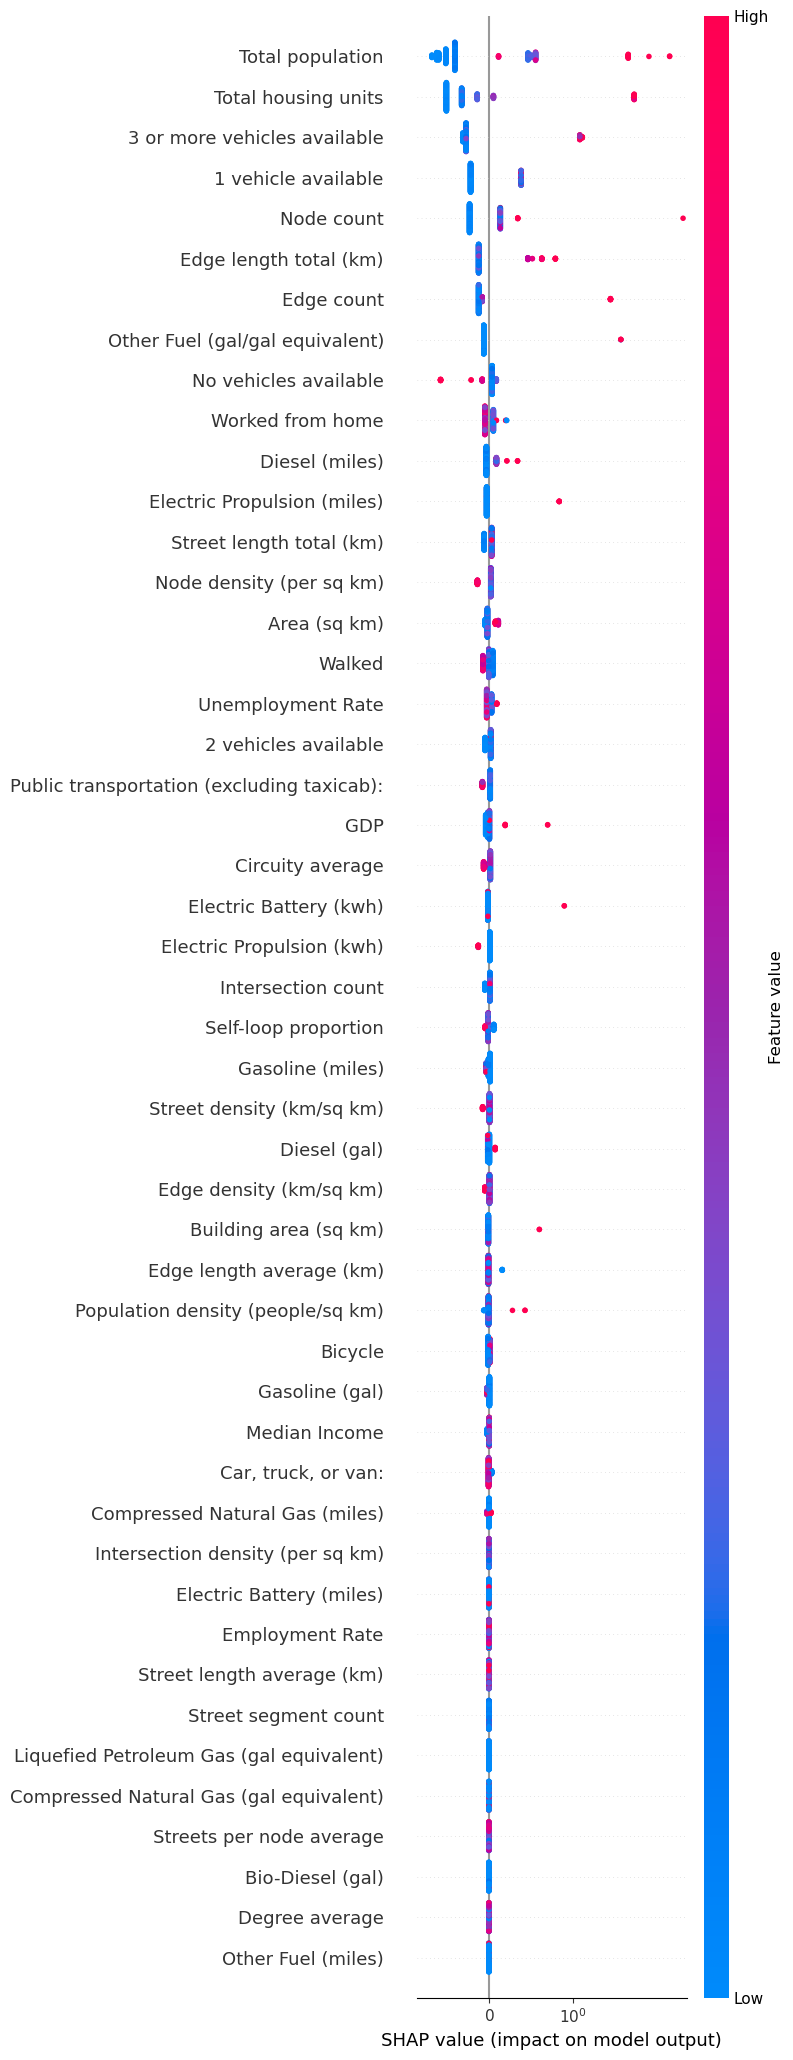

In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error
import shap
import matplotlib.pyplot as plt

# Define a function to train the model, calculate error metrics, and optionally plot SHAP values
def train_evaluate_and_shap(X, y, param_grid, test_size=0.3, random_state=42, plot_beeswarm=False, save_plot_path=None, log_scale=False):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Create a SHAP explainer
    explainer = shap.TreeExplainer(best_model)
    
    # Calculate SHAP values for the **training** set
    shap_values = explainer.shap_values(X_train)
    
    if plot_beeswarm:
        # Apply log scaling if specified
        if log_scale:
            shap_values = np.sign(shap_values) * np.log1p(np.abs(shap_values))
        
        # Create a beeswarm plot of SHAP values
        #shap.summary_plot(shap_values, X_train, show=False)
        shap.summary_plot(shap_values, X_train, show=False, max_display=X_train.shape[1])
        
        # Apply log scale to the x-axis if log scaling is used
        if log_scale:
            plt.xscale('symlog')
        
        plt.tight_layout()
        if save_plot_path:
            plt.savefig(save_plot_path, dpi=360, bbox_inches='tight')
        else:
            plt.show()
    
    return r2, mape, rmse, mse, shap_values

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(raw.drop(columns=['msa','Cluster']), drop_first=False)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7],
    'n_estimators': [50, 100, 150, 200, 250],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (emission types)
for target in ['carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']:
    # Set plot_beeswarm to True only for "carbon dioxide equivalent (MMTCO2e)"
    plot_beeswarm = (target == 'carbon dioxide equivalent (MMTCO2e)')
    
    # Train the model and calculate metrics
    y = new_df[target]
    
    # Specify the file path to save the SHAP plot, if applicable
    save_plot_path = f'../../figures/without-shap-{target.replace(" ", "_")}.jpg' if plot_beeswarm else None
    
    r2, mape, rmse, mse, shap_values = train_evaluate_and_shap(
        X, y, param_grid, plot_beeswarm=plot_beeswarm, save_plot_path=save_plot_path, log_scale=True  # Enable log scaling here
    )
    
    # Store the results
    results[target] = {'R^2': r2, 'MAPE': mape, 'RMSE': rmse, 'MSE': mse}

# Convert results to a DataFrame
results_df_with_cluster = pd.DataFrame(results).T

# Print the results DataFrame
results_df_with_cluster


Fitting 5 folds for each of 50 candidates, totalling 250 fits


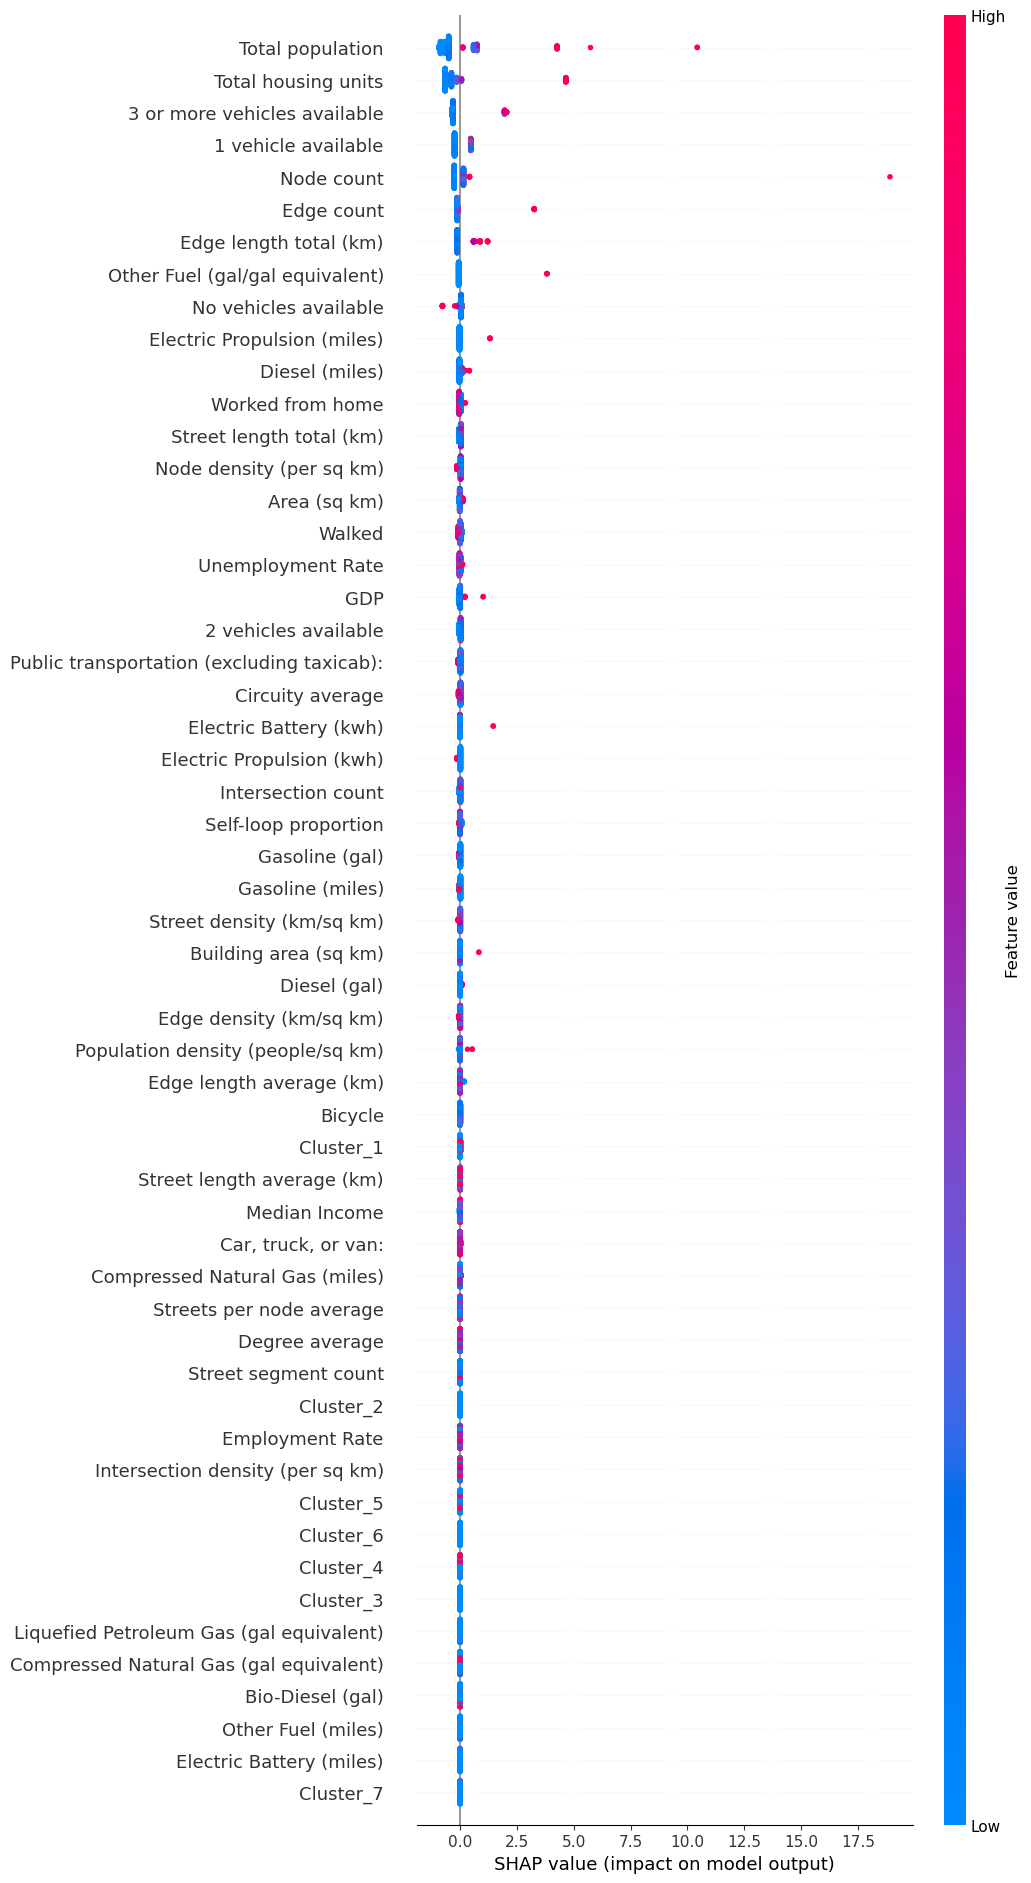

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,R^2,MAPE,RMSE,MSE
carbon dioxide equivalent (MMTCO2e),0.941541,0.172910,2.007632,4.030588
Emissions per capita (MTCO2e),0.262287,0.162277,1.309108,1.713765


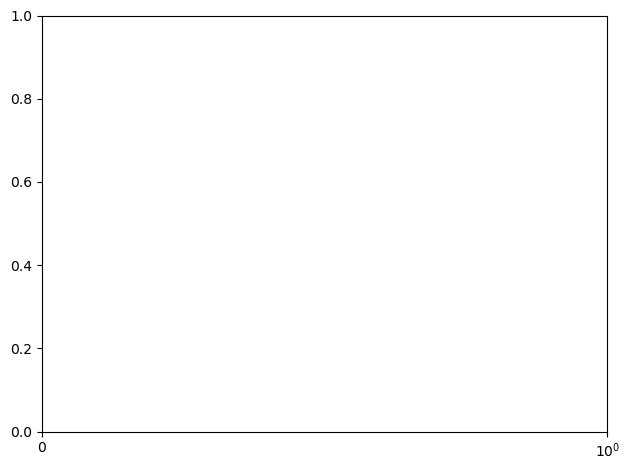

In [47]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error
import shap
import matplotlib.pyplot as plt

# Define a function to train the model, calculate error metrics, and optionally plot SHAP values
def train_evaluate_and_shap(X, y, param_grid, test_size=0.3, random_state=42, plot_beeswarm=False, save_plot_path=None, log_scale=False):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Create a SHAP explainer
    explainer = shap.TreeExplainer(best_model)
    
    # Calculate SHAP values and explanations for the **training** set
    shap_values = explainer.shap_values(X_train)
    explanation = explainer(X_train)
    
    if plot_beeswarm:
        # Apply log scaling if specified
        if log_scale:
            shap_values = np.sign(shap_values) * np.log1p(np.abs(shap_values))
        
        # Create a beeswarm plot directly using the explanation object
        shap.plots.beeswarm(explanation, max_display=X_train.shape[1])
        
        # Apply log scale to the x-axis if log scaling is used
        if log_scale:
            plt.xscale('symlog')
        
        plt.tight_layout()
        if save_plot_path:
            plt.savefig(save_plot_path, dpi=360, bbox_inches='tight')
        else:
            plt.show()  # Show the plot only when intended
    
    return r2, mape, rmse, mse, shap_values

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(raw.drop(columns=['msa']), drop_first=False)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7],
    'n_estimators': [50, 100, 150, 200, 250],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (emission types)
for target in ['carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']:
    # Set plot_beeswarm to True only for "carbon dioxide equivalent (MMTCO2e)"
    plot_beeswarm = (target == 'carbon dioxide equivalent (MMTCO2e)')
    
    # Train the model and calculate metrics
    y = new_df[target]
    
    # Specify the file path to save the SHAP plot, if applicable
    save_plot_path = f'../../figures/with-1-shap-{target.replace(" ", "_")}.jpg' if plot_beeswarm else None
    
    r2, mape, rmse, mse, shap_values = train_evaluate_and_shap(
        X, y, param_grid, plot_beeswarm=plot_beeswarm, save_plot_path=save_plot_path, log_scale=True  # Enable log scaling here
    )
    
    # Store the results
    results[target] = {'R^2': r2, 'MAPE': mape, 'RMSE': rmse, 'MSE': mse}

# Convert results to a DataFrame
results_df_with_cluster = pd.DataFrame(results).T

# Print the results DataFrame
results_df_with_cluster


Fitting 5 folds for each of 50 candidates, totalling 250 fits


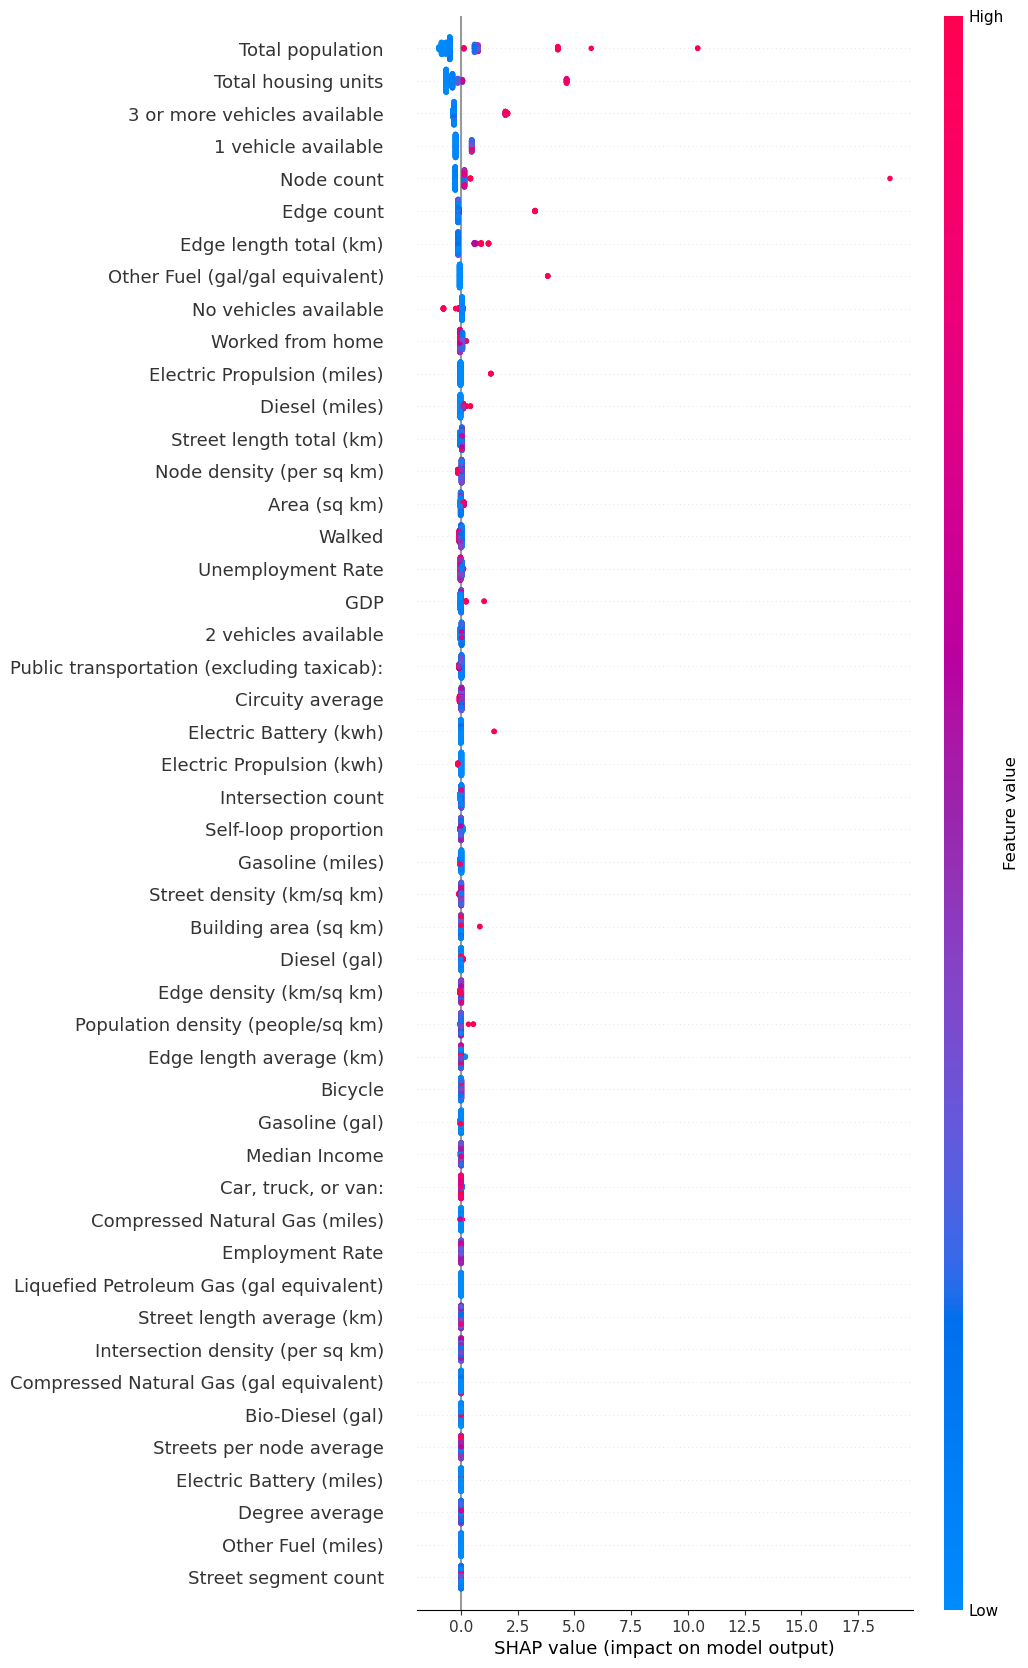

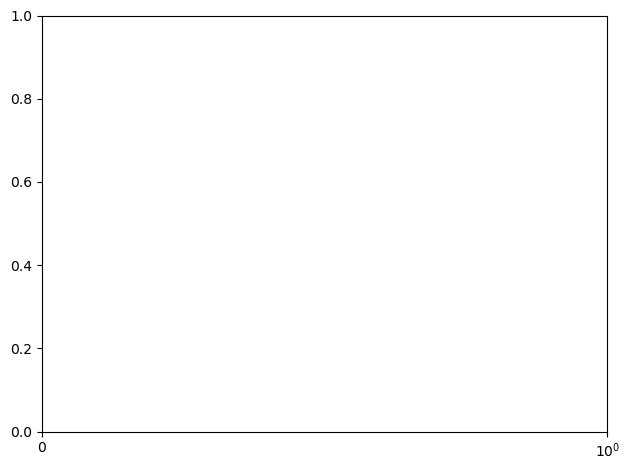

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,R^2,MAPE,RMSE,MSE
carbon dioxide equivalent (MMTCO2e),0.941466,0.172532,2.008923,4.035772
Emissions per capita (MTCO2e),0.285057,0.158534,1.288747,1.660870


In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error
import shap
import matplotlib.pyplot as plt

# Define a function to train the model, calculate error metrics, and optionally plot SHAP values
def train_evaluate_and_shap(X, y, param_grid, test_size=0.3, random_state=42, plot_beeswarm=False, save_plot_path=None, log_scale=False):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Create a SHAP explainer
    explainer = shap.TreeExplainer(best_model)
    
    # Calculate SHAP values and explanations for the **training** set
    shap_values = explainer.shap_values(X_train)
    explanation = explainer(X_train)
    
    if plot_beeswarm:
        # Apply log scaling if specified
        if log_scale:
            shap_values = np.sign(shap_values) * np.log1p(np.abs(shap_values))
        
        # Create a beeswarm plot directly using the explanation object
        shap.plots.beeswarm(explanation, max_display=X_train.shape[1])
        
        # Apply log scale to the x-axis if log scaling is used
        if log_scale:
            plt.xscale('symlog')
        
        plt.tight_layout()
        if save_plot_path:
            plt.savefig(save_plot_path, dpi=360, bbox_inches='tight')
        else:
            plt.show()
    
    return r2, mape, rmse, mse, shap_values

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(raw.drop(columns=['msa','Cluster']), drop_first=False)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7],
    'n_estimators': [50, 100, 150, 200, 250],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (emission types)
for target in ['carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']:
    # Set plot_beeswarm to True only for "carbon dioxide equivalent (MMTCO2e)"
    plot_beeswarm = (target == 'carbon dioxide equivalent (MMTCO2e)')
    
    # Train the model and calculate metrics
    y = new_df[target]
    
    # Specify the file path to save the SHAP plot, if applicable
    #save_plot_path = f'../../figures/without-1-shap-{target.replace(" ", "_")}.jpg' if plot_beeswarm else None
    
    r2, mape, rmse, mse, shap_values = train_evaluate_and_shap(
        X, y, param_grid, plot_beeswarm=plot_beeswarm, save_plot_path=save_plot_path, log_scale=True  # Enable log scaling here
    )
    
    # Store the results
    results[target] = {'R^2': r2, 'MAPE': mape, 'RMSE': rmse, 'MSE': mse}

# Convert results to a DataFrame
results_df_with_cluster = pd.DataFrame(results).T

# Print the results DataFrame
results_df_with_cluster


In [66]:
new_df

,MSA,carbon dioxide equivalent (Ton),Size--Auto,Public Transportation,Transit Alternative Fuel,Density,Active Mobility,Network Connectivity,Network Compactness,Cluster,Total population,Emissions per capita,carbon dioxide equivalent (MMTCO2e),Emissions per capita (MTCO2e)
0,"Abilene, TX",1.604661e+06,0.064028,-0.090245,-0.400060,-0.559346,-0.116166,1.189935,-0.933108,4,171354,9.364594,1.455724,8.521780
1,"Akron, OH",4.038062e+06,-0.644944,-0.092501,0.164063,2.346351,-0.385593,0.417458,0.117013,5,703286,5.741707,3.663268,5.224953
2,"Albany, GA",1.062811e+06,-0.260352,0.017480,0.051700,-0.639637,-0.544648,0.891404,-0.652800,4,147431,7.208870,0.964166,6.560072
3,"Albany-Lebanon, OR",9.640033e+05,-0.245210,0.049604,0.265477,-1.116083,-0.324938,-0.909080,-1.168184,4,127216,7.577689,0.874529,6.895697
4,"Albany-Schenectady-Troy, NY",4.416599e+06,0.192923,-0.144945,-0.251121,0.409409,0.719031,0.376100,0.017240,5,880766,5.014498,4.006672,4.563193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"Yakima, WA",1.345779e+06,0.028180,0.015642,0.263209,-1.323508,-0.913108,0.023896,-1.262105,1,250649,5.369176,1.220870,4.885950
351,"York-Hanover, PA",2.087107e+06,-0.667277,-0.056662,0.188996,1.740468,-0.612997,0.558831,-0.484439,1,447628,4.662592,1.893391,4.242959
352,"Youngstown-Warren-Boardman, OH-PA",3.089513e+06,-0.138366,-0.086734,-0.145649,0.828986,-0.601778,0.650931,-0.057509,5,538115,5.741362,2.802759,5.224640
353,"Yuba City, CA",5.800871e+05,-0.413179,0.043812,0.134645,-0.453808,-0.491657,-0.147507,-0.227548,4,173839,3.336922,0.526246,3.036599


In [27]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error

# Define a function to train the model and calculate error metrics
def train_and_evaluate(X, y, param_grid, test_size=0.3, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    return r2, mape, rmse, mse

# Define the parameter grid to search over
param_grid = {
    'max_depth': [1,2,3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,0.7],
    'n_estimators': [100, 200, 300, 400, 500],
    # 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    # 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(raw.drop(columns=['msa']), drop_first=False)

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (emission types)
for target in ['carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']:
    y = new_df[target]
    r2, mape, rmse, mse = train_and_evaluate(X, y, param_grid)
    results[target] = {'R^2': r2, 'MAPE': mape, 'RMSE': rmse, 'MSE': mse}

# Convert results to a DataFrame
results_df_with_cluster = pd.DataFrame(results).T

# Print the results DataFrame
results_df_with_cluster

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


,R^2,MAPE,RMSE,MSE
carbon dioxide equivalent (MMTCO2e),0.941366,0.174764,2.010630,4.042634
Emissions per capita (MTCO2e),0.256816,0.162008,1.313954,1.726474


In [29]:
combined_df = pd.concat([results_df_without_cluster, results_df_with_cluster], axis=0)
combined_df.index = ['Emissions without cluster', 'Per Capita Emissions without cluster', 'Emissions with cluster', 'Per Capita Emissions with cluster']
combined_df

,R^2,MAPE,RMSE,MSE
Emissions without cluster,0.942184,0.171236,1.996564,3.986269
Per Capita Emissions without cluster,0.286223,0.160477,1.287695,1.658159
Emissions with cluster,0.941366,0.174764,2.010630,4.042634
Per Capita Emissions with cluster,0.256816,0.162008,1.313954,1.726474


In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error

# Define a function to train the model and calculate error metrics
def train_and_evaluate(X, y, param_grid, test_size=0.3, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    return r2, mape, rmse, mse

# Define the parameter grid to search over
param_grid = {
    'max_depth': [1,2,3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,0.7],
    'n_estimators': [100, 200, 300, 400, 500],
    # 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    # 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(new_df.drop(columns=['MSA','Cluster', 'carbon dioxide equivalent (Ton)', 'Total population', 'Emissions per capita', 'carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']), drop_first=False)

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (emission types)
for target in ['carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']:
    y = new_df[target]
    r2, mape, rmse, mse = train_and_evaluate(X, y, param_grid)
    results[target] = {'R^2': r2, 'MAPE': mape, 'RMSE': rmse, 'MSE': mse}

# Convert results to a DataFrame
results_df_without_cluster = pd.DataFrame(results).T

# Print the results DataFrame
results_df_without_cluster


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


,R^2,MAPE,RMSE,MSE
carbon dioxide equivalent (MMTCO2e),0.723760,0.367192,4.364175,19.046020
Emissions per capita (MTCO2e),0.088913,0.186093,1.454829,2.116528


In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_percentage_error

# Define a function to train the model and calculate error metrics
def train_and_evaluate(X, y, param_grid, test_size=0.3, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    return r2, mape, rmse, mse

# Define the parameter grid to search over
param_grid = {
    'max_depth': [1,2,3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,0.7],
    'n_estimators': [100, 200, 300, 400, 500],
    # 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    # 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(new_df.drop(columns=['MSA', 'carbon dioxide equivalent (Ton)', 'Total population', 'Emissions per capita', 'carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']), drop_first=False)

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (emission types)
for target in ['carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']:
    y = new_df[target]
    r2, mape, rmse, mse = train_and_evaluate(X, y, param_grid)
    results[target] = {'R^2': r2, 'MAPE': mape, 'RMSE': rmse, 'MSE': mse}

# Convert results to a DataFrame
results_df_with_cluster = pd.DataFrame(results).T

# Print the results DataFrame
results_df_with_cluster


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


,R^2,MAPE,RMSE,MSE
carbon dioxide equivalent (MMTCO2e),0.757840,0.369579,4.086104,16.696248
Emissions per capita (MTCO2e),-0.003401,0.192731,1.526754,2.330979


In [32]:
combined_df = pd.concat([results_df_without_cluster, results_df_with_cluster], axis=0)
combined_df.index = ['Emissions without cluster', 'Per Capita Emissions without cluster', 'Emissions with cluster', 'Per Capita Emissions with cluster']
combined_df

,R^2,MAPE,RMSE,MSE
Emissions without cluster,0.723760,0.367192,4.364175,19.046020
Per Capita Emissions without cluster,0.088913,0.186093,1.454829,2.116528
Emissions with cluster,0.757840,0.369579,4.086104,16.696248
Per Capita Emissions with cluster,-0.003401,0.192731,1.526754,2.330979


In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, make_scorer

# Define a function to train the model and calculate error metrics
def train_and_evaluate(X, y, param_grid, test_size=0.3, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', use_label_encoder=False)
    
    # Use RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        cv=5,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )
    
    # Fit the model on the training data
    random_search.fit(X_train, y_train)
    
    # Train the final model with the best hyperparameters
    best_model = random_search.best_estimator_
    
    # Predict on both the training set and the test set
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Calculate error metrics for the training set
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    
    # Calculate error metrics for the test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    
    return {
        'train': {'R^2': r2_train, 'MAPE': mape_train, 'RMSE': rmse_train, 'MSE': mse_train},
        'test': {'R^2': r2_test, 'MAPE': mape_test, 'RMSE': rmse_test, 'MSE': mse_test}
    }

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Encode the cluster labels as categorical variables
raw['Cluster'] = raw['Cluster'].astype('category')

# One-hot encode the categorical variables except 'Cluster'
X = pd.get_dummies(new_df.drop(columns=['MSA', 'carbon dioxide equivalent (Ton)', 'Total population', 'Emissions per capita', 'carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']), drop_first=False)

# Define a dictionary to store the results
results = {}

# Iterate over the different target variables (emission types)
for target in ['carbon dioxide equivalent (MMTCO2e)', 'Emissions per capita (MTCO2e)']:
    y = new_df[target]
    metrics = train_and_evaluate(X, y, param_grid)
    results[target] = metrics

# Convert results to a DataFrame for easier viewing
train_results_df = pd.DataFrame({k: v['train'] for k, v in results.items()}).T
test_results_df = pd.DataFrame({k: v['test'] for k, v in results.items()}).T


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [18]:
train_results_df

,R^2,MAPE,RMSE,MSE
carbon dioxide equivalent (MMTCO2e),0.998999,0.100028,0.178323,0.031799
Emissions per capita (MTCO2e),0.933970,0.049130,0.362311,0.131269
